**1. Impor Library**

In [1]:
# Modul 'os' menyediakan fungsi untuk berinteraksi dengan sistem operasi
import os

# 'Numpy' digunakan untuk operasi matematika pada array dan matriks berukuran besar
import numpy as np

# 'Pandas' digunakan untuk manipulasi dan analisis data
import pandas as pd

# 'Matplotlib' adalah perpustakaan visualisasi data untuk plot 2D dan 3D, dibangun di atas numpy
from matplotlib import pyplot as plt
%matplotlib inline

# 'Seaborn' didasarkan pada matplotlib; digunakan untuk membuat grafik statistik
import seaborn as sns

# Untuk menekan peringatan
import warnings
warnings.filterwarnings("ignore")

**2. Mengimpor dan Eksplorasi Data**

In [6]:
# Memuat data dan mengatur client_id unik sebagai indeks

df = pd.read_csv('pinjaman.csv', index_col='client_id')

In [7]:
# Menampilkan 5 baris pertama dari dataset
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [8]:
# Untuk memeriksa Dimensi dari dataset
df.shape

(443, 7)

In [9]:
# Memeriksa informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


**3. Memeriksa tipe data kolom-kolom**

In [10]:
df.dtypes

loan_type       object
loan_amount      int64
repaid           int64
loan_id          int64
loan_start      object
loan_end        object
rate           float64
dtype: object

**4.1 Mengubah tipe data kolom-kolom**


- loan_id menjadi objek
- repaid menjadi tipe kategori
- loan_start dan loan_end menjadi tipe tanggal

In [13]:
# loan_id
df['loan_id'] = df['loan_id'].astype('object')

# repaid
df['repaid'] = df['repaid'].astype('category')

In [14]:
# loan_start
df['loan_start'] = pd.to_datetime(df['loan_start'], format='%Y-%m-%d')

# loan_end
df['loan_end'] = pd.to_datetime(df['loan_end'], format='%Y-%m-%d')

**4.2 Memeriksa tipe data lagi**

In [15]:
df.dtypes

loan_type              object
loan_amount             int64
repaid               category
loan_id                object
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
dtype: object

**5. Statistik Ringkas dari Data**

In [16]:
# Statistik Ringkas untuk Data Numerik
df.describe()

,loan_amount,rate
count,443.000000,443.000000
mean,7982.311512,3.217156
std,4172.891992,2.397168
min,559.000000,0.010000
25%,4232.500000,1.220000
50%,8320.000000,2.780000
75%,11739.000000,4.750000
max,14971.000000,12.620000


In [17]:
# Statistik Ringkas untuk Data Kategorikal
df.describe(exclude=[np.number])

,loan_type,repaid,loan_id,loan_start,loan_end
count,443,443.0,443.0,443,443
unique,4,2.0,443.0,430,428
top,home,1.0,10243.0,2007-05-16 00:00:00,2008-08-29 00:00:00
freq,121,237.0,1.0,2,2
first,NaN,NaN,NaN,2000-01-26 00:00:00,2001-08-02 00:00:00
last,NaN,NaN,NaN,2014-11-11 00:00:00,2017-05-07 00:00:00


**6. Nilai yang Hilang**

Tidak ada nilai yang hilang dalam data.

Pustaka scikit-learn memiliki fungsi bawaan yang disebut Iterative Imputer untuk mengisi nilai yang hilang.

In [18]:
# gunakan isnull().sum() untuk memeriksa nilai yang hilang
df.isnull().sum()

loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64

**7. Pengolahan Pencilan**

Untuk memeriksa keberadaan pencilan, kita membuat diagram Boxplot.

Dapat dilihat bahwa tidak ada pencilan dalam kolom loan_amount dan beberapa pencilan hadir dalam kolom rate. Untuk mengatasi pencilan, kita dapat membatasi nilai atau mengubah data. Akan menunjukkan kedua pendekatan ini di sini.

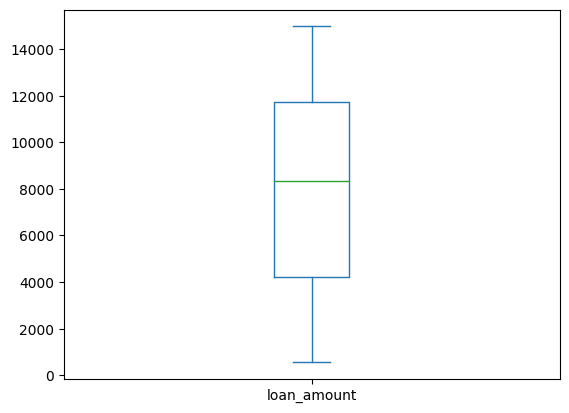

In [19]:
# Untuk loan_amount
df['loan_amount'].plot(kind='box')
plt.show()

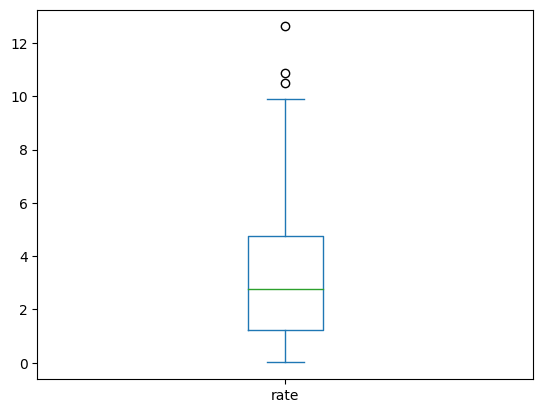

In [20]:
# Untuk rate
df['rate'].plot(kind='box')
plt.show()

**8. Transformasi**

8.1 Transformasi AKAR KUADRAT

Hasil :
Kolom Rate awalnya miring ke kanan. Skewness dan kurtosis telah berkurang secara signifikan. Rate yang telah diubah dengan AKAR KUADRAT, pada grafik kanan, sekarang menyerupai distribusi normal.

In [21]:
df['AKAR_KUADRAT_RATE'] = df['rate']**0.5

In [22]:
df['akar_kuadrat_rate'] = np.sqrt(df['rate'])

In [23]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,AKAR_KUADRAT_RATE,akar_kuadrat_rate
client_id,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,1.466288
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,1.118034
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,0.824621
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,1.113553
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.769181


In [25]:
# Memeriksa skewness, kurtosis antara data asli dan data yang telah diubah
print("Skewness dari data asli adalah {}".format(df.rate.skew()))
print('Skewness dari data yang telah diubah dengan AKAR KUADRAT adalah {}'.format(df.AKAR_KUADRAT_RATE.skew()))

print('')

print("Kurtosis dari data asli adalah {}".format(df.rate.kurt()))
print("Kurtosis dari data yang telah diubah dengan AKAR KUADRAT adalah {}".format(df.AKAR_KUADRAT_RATE.kurt()))

Skewness dari data asli adalah 0.884204614329943
Skewness dari data yang telah diubah dengan AKAR KUADRAT adalah 0.04964154055528862

Kurtosis dari data asli adalah 0.42437165143736433
Kurtosis dari data yang telah diubah dengan AKAR KUADRAT adalah -0.6318437642052039


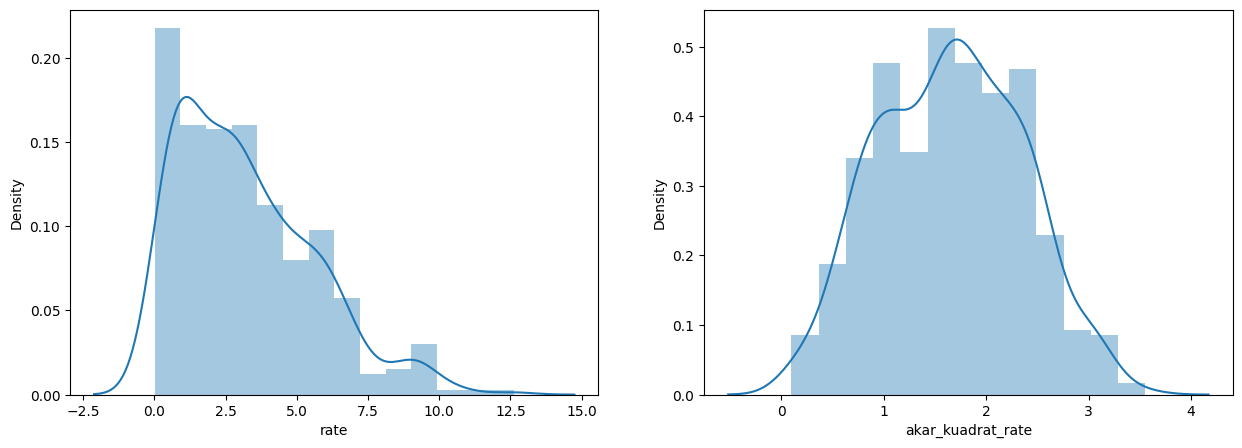

In [37]:
# plotting distribusi
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.distplot(df['rate'], ax=axes[0])
sns.distplot(df['akar_kuadrat_rate'], ax=axes[1])

plt.show()

8.2 Transformasi Logaritma

Kesimpulan :
Transformasi Logaritma membuat data Rate menjadi miring ke kiri dan lebih tajam.

Namun, transformasi Logaritma lebih mendekati nilai 0 dan lebih normal. Meskipun itu memanipulasi data dengan lebih berat.

Dalam kasus kami, transformasi akar kuadrat lebih sesuai.

Terdapat transformasi lain yang disebut BoxCox. Ada fungsi bawaan dalam pustaka Sci-kit Learn yang disebut PowerTransformer untuk ini yang juga dapat dipanggil untuk mengubah data. Kita akan melihat bagaimana cara kerjanya di bawah.

In [27]:
df['Log Rate'] = np.log(df['rate'])

In [28]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,AKAR_KUADRAT_RATE,akar_kuadrat_rate,Log Rate
client_id,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,1.466288,0.765468
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,1.118034,0.223144
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,0.824621,-0.385662
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,1.113553,0.215111
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.769181,1.141033


In [38]:
print("Skewness dari data asli adalah {}".format(df.rate.skew()))
print('Skewness dari data yang telah diubah dengan AKAR KUADRAT adalah {}'.format(df.AKAR_KUADRAT_RATE.skew()))
print("Skewness dari data yang telah diubah dengan LOG adalah {}".format(df['Logaritma Rate'].skew()))

print('')

print("Kurtosis dari data asli adalah {}".format(df.rate.kurt()))
print("Kurtosis dari data yang telah diubah dengan AKAR KUADRAT adalah {}".format(df.AKAR_KUADRAT_RATE.kurt()))
print("Kurtosis dari data yang telah diubah dengan LOG adalah {}".format(df['Logaritma Rate'].kurt()))

Skewness dari data asli adalah 0.884204614329943
Skewness dari data yang telah diubah dengan AKAR KUADRAT adalah 0.04964154055528862


KeyError: ignored

KeyError: ignored

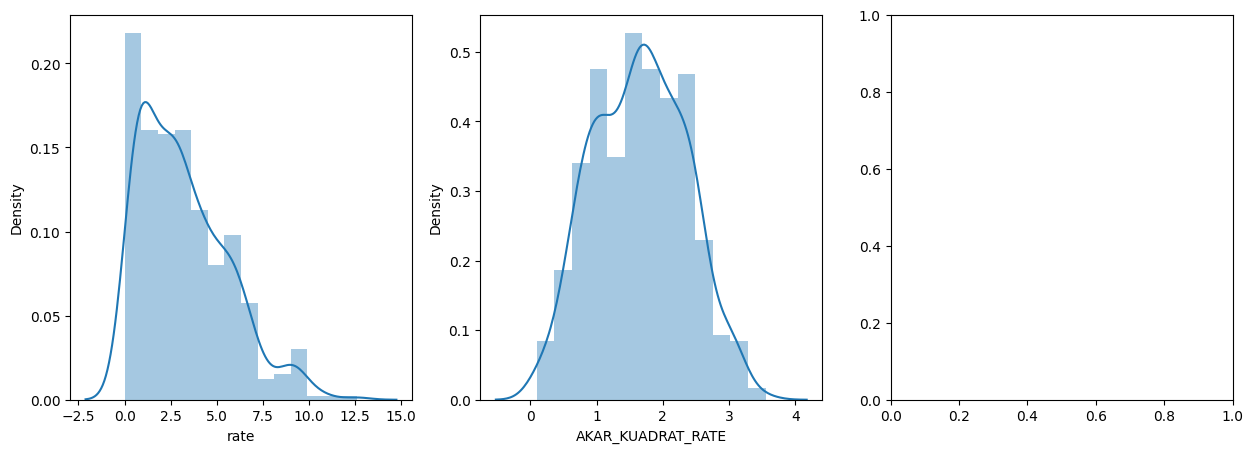

In [39]:
# plot grafik
fig, axes = plt.subplots(1,3,figsize=(15,5))

sns.distplot(df['rate'], ax=axes[0])
sns.distplot(df['AKAR_KUADRAT_RATE'], ax=axes[1])
sns.distplot(df['Logaritma Rate'], ax=axes[2])

plt.show()

In [40]:
# Menggunakan fungsi Lambda
df['LOG_Rate'] = df['rate'].apply(lambda x:np.log(x))

In [32]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,AKAR_KUADRAT_RATE,akar_kuadrat_rate,Log Rate,LOG_Rate
client_id,,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,1.466288,0.765468,0.765468
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,1.118034,0.223144,0.223144
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,0.824621,-0.385662,-0.385662
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,1.113553,0.215111,0.215111
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.769181,1.141033,1.141033


**Pengolahan Pencilan dengan Pendekatan Penutupan**

Pendekatan Z-Score untuk mengatasi Pencilan :

Semua nilai di atas 3 deviasi standar dan di bawah -3 deviasi standar adalah pencilan dan dapat dihapus.

In [41]:
# Memuat dataset dan mengatur client id sebagai indeks
df1 = pd.read_csv('pinjaman.csv', index_col='client_id')
df1.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [42]:
# loan_id
df1['loan_id'] = df1['loan_id'].astype('object')

# repaid
df1['repaid'] = df1['repaid'].astype('category')

In [43]:
# loan_start
df1['loan_start'] = pd.to_datetime(df1['loan_start'], format='%Y-%m-%d')

# loan_end
df1['loan_end'] = pd.to_datetime(df1['loan_end'], format='%Y-%m-%d')

In [44]:
# 'SciPy' digunakan untuk melakukan komputasi ilmiah
import scipy.stats as stats

Menggunakan Pustaka SciPy untuk menghitung Z-Score :

In [46]:
# Membuat variabel baru dengan Z-Score setiap catatan
df1['ZR'] = stats.zscore(df1['rate'])

In [47]:
df1.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,ZR
client_id,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.445677
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.821544
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.059594
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.825721
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.036399


In [48]:
# Kombinasi Batas Bawah dan Batas Atas
df1[(df1['ZR']<-3) | (df1['ZR']>3)]

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,ZR
client_id,,,,,,,,
41480,credit,2947,1,10302,2005-11-10,2008-03-16,10.49,3.037362
48177,other,6318,0,10224,2003-02-02,2005-05-08,10.89,3.204415
49624,home,8133,1,10312,2009-03-14,2011-03-21,12.62,3.926916


In [49]:
# Jumlah pencilan
df1[(df1['ZR']<-3) | (df1['ZR']>3)].shape[0]

3

In [50]:
# Data Bersih : tanpa pencilan sehingga z > -3 dan z < +3
df2 = df1[(df1['ZR']>-3) & (df1['ZR']<3)].reset_index()
df2.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,ZR
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.445677
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.821544
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.059594
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.825721
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.036399


In [51]:
df1.shape

(443, 8)

In [52]:
df2.shape

(440, 9)

Interpretasi :

Cara kasar untuk mengetahui apakah pencilan telah dihapus atau tidak adalah dengan memeriksa dimensi data. Dari output di atas, kita dapat melihat bahwa dimensinya berkurang, yang berarti bahwa pencilan telah dihapus.

In [53]:
df3 = df2.copy()

In [54]:
df3.drop(columns = ['ZR'], inplace=True)
df3.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


Metode IQR untuk mengatasi Pencilan :

Semua nilai di bawah Q1 - 1,5IQR dan nilai di atas Q3 + 1,5IQR adalah pencilan dan dapat dihapus.

In [55]:
# Mencari Kuantil
Q1 = df3.rate.quantile(0.25)
Q2 = df3.rate.quantile(0.50)
Q3 = df3.rate.quantile(0.75)

# IQR : Rentang Inter-Kuartil
IQR = Q3 - Q1

# Batas Bawah:
LC = Q1 - (1,5*IQR)

# Batas Atas:
UC = Q3 + (1,5*IQR)

display(LC)
display(UC)

array([  0.2175, -16.095 ])

array([ 5.68  , 21.9925])

ValueError: ignored

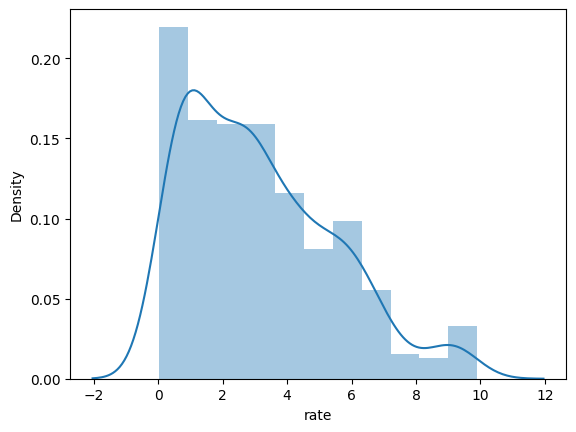

In [56]:
# Plot
sns.distplot(df3.rate)
plt.axvline(UC, color='r')
plt.axvline(LC, color='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

In [57]:
# Temukan jumlah Pencilan berdasarkan IQR
df3[(df3.rate<LC) | (df3.rate>UC)].reset_index(drop=True)

ValueError: ignored

In [58]:
df3[(df3.rate<LC) | (df3.rate>UC)].shape[0]

ValueError: ignored

In [59]:
# Simpan data bersih berdasarkan IQR
df4 = df3[(df3.rate>LC) & (df3.rate<UC)]
df4.head()

ValueError: ignored

In [60]:
df3.shape

(440, 8)

In [61]:
df4.shape

NameError: ignored

Interpretasi :

Cara kasar untuk mengetahui apakah pencilan telah dihapus atau tidak adalah dengan memeriksa dimensi data. Dari output di atas, kita dapat melihat bahwa dimensinya berkurang, yang berarti bahwa pencilan telah dihapus.

In [62]:
# Diagram Kotak untuk rate --- berdasarkan Metode IQR
sns.boxplot(df1.rate)
plt.show()

KeyError: ignored

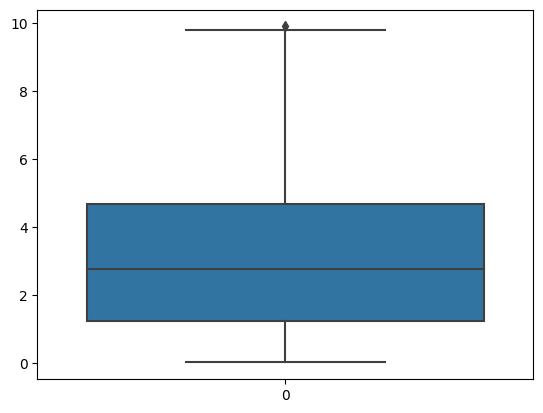

In [63]:
# Diagram Kotak untuk rate --- berdasarkan data yang telah dibersihkan dengan Z-Score
sns.boxplot(df2.rate)
plt.show()

In [64]:
# Diagram Kotak untuk rate --- berdasarkan data yang telah dibersihkan dengan IQR
sns.boxplot(df4.rate)
plt.show()

NameError: ignored

**6. Scaling Fitur Numerik**

Ada dua cara untuk menskalakan data:

Standarisasi (Z-Score)

Normalisasi : Min Max Scalar
Kedua metode dapat dilakukan secara manual maupun menggunakan fungsi bawaan di sklearn. Akan menunjukkan keduanya.

6.1 Standarisasi (Z-Score)

Menskalakan data menggunakan rumus (x-rata)/deviasi standar

Secara Manual :

In [65]:
# untuk Rate
avg_rate = df3['rate'].mean()
avg_rate

3.161818181818182

In [66]:
std_rate = df3['rate'].std()
std_rate

2.3079474188229154

In [67]:
# Langkah 1 : transformasi menggunakan Z-score
df3['Z_Score_Rate'] = (df3['rate'] - avg_rate)/std_rate

In [68]:
df3.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,Z_Score_Rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.438406
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.828363
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.075336
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.832696
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.013786


In [69]:
# memeriksa apakah skewness dan kurtosis setelah scaling atau tidak
# Untuk Rate
print("Skewness untuk data asli adalah {}.".format(df3.rate.skew()))
print("Kurtosis untuk data asli adalah {}.".format(df3.rate.kurt()))

print('')

print("Skewness untuk kolom yang telah diubah dengan Z-score adalah {}.".format(df3.Z_Score_Rate.skew()))
print("Kurtosis untuk kolom yang telah diubah dengan Z-score adalah {}.".format(df3.Z_Score_Rate.kurt()))

Skewness untuk data asli adalah 0.7594062707815686.
Kurtosis untuk data asli adalah -0.05964248048746912.

Skewness untuk kolom yang telah diubah dengan Z-score adalah 0.7594062707815691.
Kurtosis untuk kolom yang telah diubah dengan Z-score adalah -0.05964248048746823.


In [70]:
# Untuk Loan_amount
avg_LA = df3['loan_amount'].mean()
avg_LA

7997.195454545455

In [71]:
std_LA = df3['loan_amount'].std()
std_LA

4179.435966237437

In [72]:
# Langkah 1 : transformasi menggunakan Z-score
df3['Z_Score_LA'] = (df3['loan_amount'] - avg_LA)/std_LA

In [73]:
df3.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,Z_Score_Rate,Z_Score_LA
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.438406,1.357792
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.828363,0.429916
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.075336,1.133360
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.832696,1.081678
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.013786,1.447996


In [74]:
# memeriksa apakah skewness dan kurtosis setelah scaling atau tidak
# Untuk Loan_amount
print("Skewness untuk data asli adalah {}.".format(df3.loan_amount.skew()))
print("Kurtosis untuk data asli adalah {}.".format(df3.loan_amount.kurt()))

print('')

print("Skewness untuk kolom yang telah diubah dengan Z-score adalah {}.".format(df3.Z_Score_LA.skew()))
print("Kurtosis untuk kolom yang telah diubah dengan Z-score adalah {}.".format(df3.Z_Score_LA.kurt()))

Skewness untuk data asli adalah -0.04678765472024289.
Kurtosis untuk data asli adalah -1.2354309429278456.

Skewness untuk kolom yang telah diubah dengan Z-score adalah -0.04678765472024289.
Kurtosis untuk kolom yang telah diubah dengan Z-score adalah -1.2354309429278456.


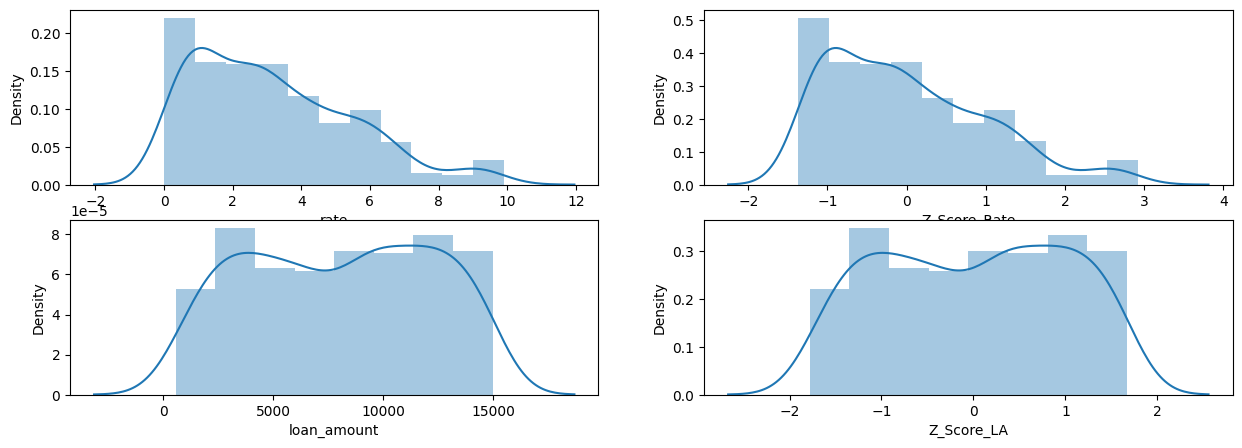

In [75]:
# Distribusi dari kolom-kolom
fig, axes = plt.subplots(2,2, figsize=(15,5))

sns.distplot(df3['rate'], ax=axes[0,0])
sns.distplot(df3['Z_Score_Rate'], ax=axes[0,1])
sns.distplot(df3['loan_amount'], ax=axes[1,0])
sns.distplot(df3['Z_Score_LA'], ax=axes[1,1])

plt.show()

Satu-satunya perbedaan antara dua kurva tersebut adalah pada Rentang di sumbu x. Dampak dari penskalaan pada data adalah: Skewness, Kurtosis, dan Distribusi tetap sama.

Alasan untuk Penskalaan adalah :

Perbandingan antara variabel lebih mudah
Daya komputasi lebih efisien dan memakan waktu lebih sedikit.

In [76]:
# Data Pinjaman
df4 = df3.copy()
df4.drop(columns=['Z_Score_Rate'], inplace=True)
df4.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,Z_Score_LA
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.357792
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,0.429916
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,1.133360
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.081678
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.447996


In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
df4_num = df[['loan_amount', 'rate']]
df4_num.head()

,loan_amount,rate
client_id,,
46109,13672,2.15
46109,9794,1.25
46109,12734,0.68
46109,12518,1.24
46109,14049,3.13


In [79]:
SS = StandardScaler()

scaled_x = SS.fit_transform(df4_num)
scaled_x

array([[ 1.36502962e+00, -4.45676908e-01],
       [ 4.34647423e-01, -8.21544457e-01],
       [ 1.13999132e+00, -1.05959390e+00],
       [ 1.08817014e+00, -8.25720763e-01],
       [ 1.45547678e+00, -3.63989115e-02],
       [-2.51263533e-01, -5.33379336e-01],
       [-4.33117505e-01,  2.61555546e+00],
       [ 1.12127812e+00,  3.85408004e-01],
       [ 7.38856969e-01,  9.45033020e-01],
       [-9.43412224e-01,  4.35523677e-01],
       [-1.52688038e+00,  1.36683993e+00],
       [ 1.01648330e-01, -1.13476741e+00],
       [ 2.57831622e-01, -9.84420394e-01],
       [-1.06960640e+00,  1.15384832e+00],
       [ 6.88715175e-01, -1.65864400e-01],
       [-1.54338725e-01, -8.04839232e-01],
       [ 9.52619355e-01,  3.45982920e-02],
       [ 5.00143642e-01, -4.05752176e-02],
       [ 9.66054477e-01, -1.01365454e+00],
       [-1.78094813e+00,  3.89584310e-01],
       [ 1.20620728e+00, -5.33379336e-01],
       [-9.91154890e-01, -1.00530192e+00],
       [ 1.04767198e-01, -9.96949312e-01],
       [ 9.

Normalisasi :

Min Max Scalar
Menskalakan data menggunakan rumus (x - min)/(max - min)

Secara Manual :

Normalisasi: Min Max Scalar
Menskalakan data menggunakan rumus (x - min)/(max - min)

Secara Manual :

In [80]:
# Untuk Rate
min_rate = df4.rate.min()
min_rate

0.01

In [81]:
max_rate = df4.rate.max()
max_rate

9.91

In [82]:
df4['Min_Max_R'] = (df4['rate'] - min_rate)/ (max_rate - min_rate)

In [83]:
# memeriksa apakah skewness dan kurtosis setelah scaling atau tidak
# Untuk Rate
print("Skewness untuk data asli adalah {}.".format(df4.rate.skew()))
print("Skewness untuk kolom yang telah diubah dengan Z-score adalah {}.".format(df3.Z_Score_Rate.skew()))
print("Skewness untuk Min Max Scaled Data adalah {}.".format(df4.Min_Max_R.skew()))


print('')

print("Kurtosis untuk data asli adalah {}.".format(df4.rate.kurt()))
print("Kurtosis untuk kolom yang telah diubah dengan Z-score adalah {}.".format(df3.Z_Score_Rate.kurt()))
print("Kurtosis untuk Min Max Scaled Data adalah {}.".format(df4.Min_Max_R.kurt()))

Skewness untuk data asli adalah 0.7594062707815686.
Skewness untuk kolom yang telah diubah dengan Z-score adalah 0.7594062707815691.
Skewness untuk Min Max Scaled Data adalah 0.7594062707815686.

Kurtosis untuk data asli adalah -0.05964248048746912.
Kurtosis untuk kolom yang telah diubah dengan Z-score adalah -0.05964248048746823.
Kurtosis untuk Min Max Scaled Data adalah -0.05964248048746823.


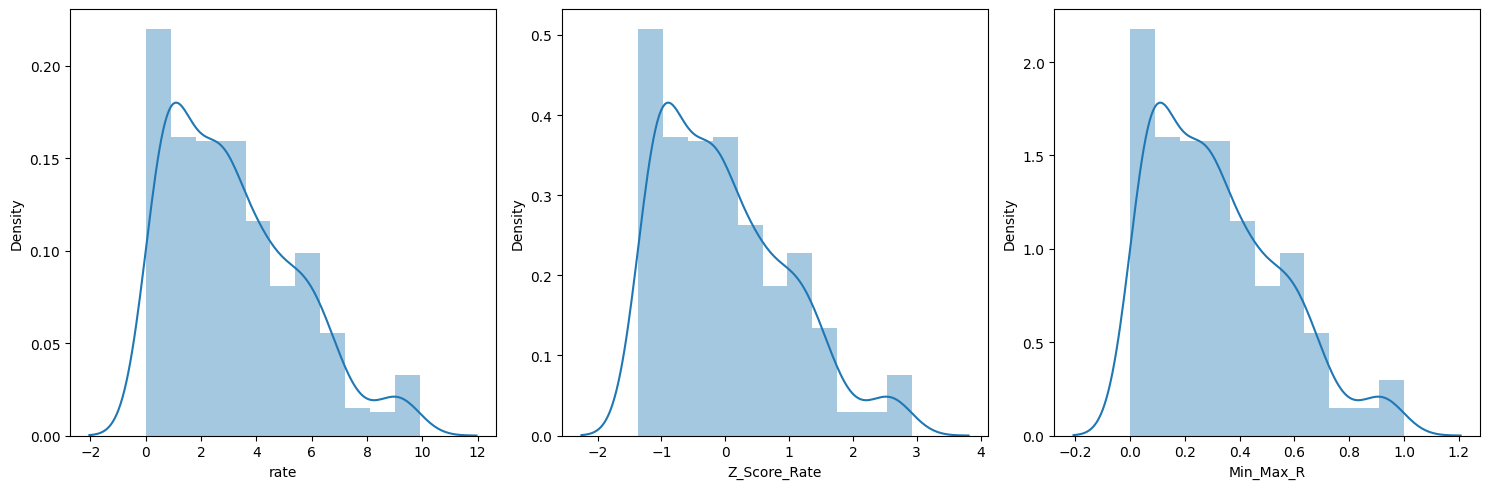

In [84]:
# Distribusi dari kolom-kolom
# Untuk Rate
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.distplot(df3['rate'], ax=axes[0])
sns.distplot(df3['Z_Score_Rate'], ax=axes[1])
sns.distplot(df4['Min_Max_R'], ax=axes[2])

plt.tight_layout()
plt.show()

In [85]:
# Untuk Loan_amount
min_LA = df4.loan_amount.min()
min_LA

559

In [86]:
max_LA = df4.loan_amount.max()
max_LA

14971

In [87]:
df4['Min_Max_LA'] = (df4['loan_amount'] - min_LA)/ (max_LA - min_LA)

In [88]:
# memeriksa apakah skewness dan kurtosis setelah scaling atau tidak
# Untuk Rate
print("Skewness untuk data asli adalah {}.".format(df4.loan_amount.skew()))
print("Skewness untuk kolom yang telah diubah dengan Z-score adalah {}.".format(df3.Z_Score_LA.skew()))
print("Skewness untuk Min Max Scaled Data adalah {}.".format(df4.Min_Max_LA.skew()))


print('')

print("Kurtosis untuk data asli adalah {}.".format(df4.loan_amount.kurt()))
print("Kurtosis untuk kolom yang telah diubah dengan Z-score adalah {}.".format(df3.Z_Score_LA.kurt()))
print("Kurtosis untuk Min Max Scaled Data adalah {}.".format(df4.Min_Max_LA.kurt()))

Skewness untuk data asli adalah -0.04678765472024289.
Skewness untuk kolom yang telah diubah dengan Z-score adalah -0.04678765472024289.
Skewness untuk Min Max Scaled Data adalah -0.04678765472024256.

Kurtosis untuk data asli adalah -1.2354309429278456.
Kurtosis untuk kolom yang telah diubah dengan Z-score adalah -1.2354309429278456.
Kurtosis untuk Min Max Scaled Data adalah -1.2354309429278452.


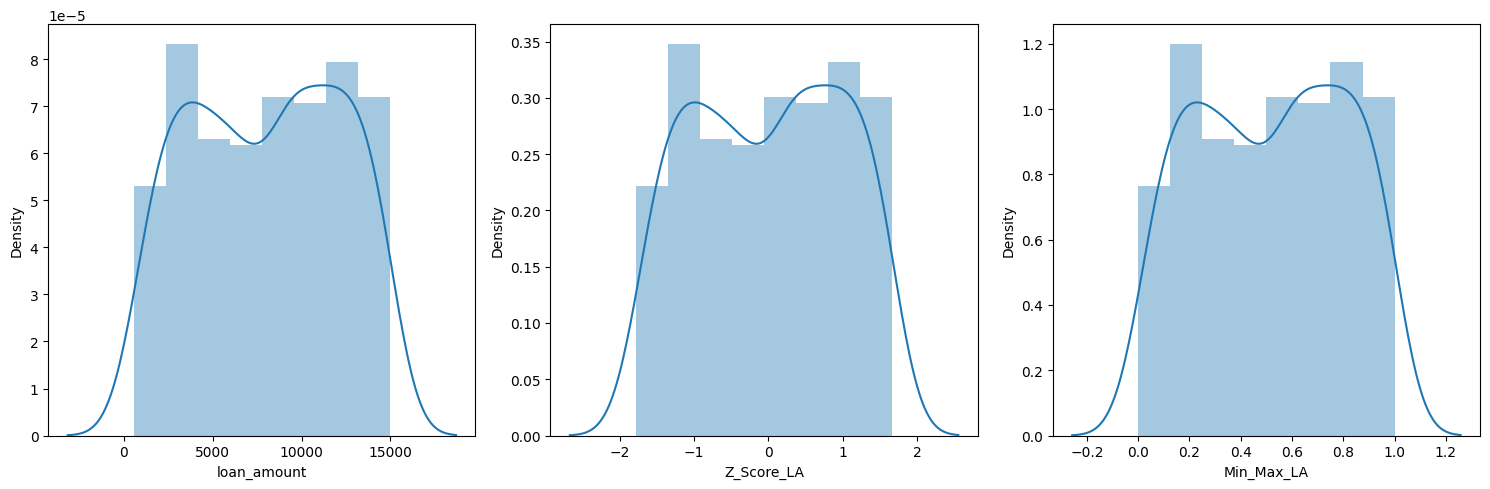

In [89]:
# Distribusi dari kolom-kolom
# Untuk Loan_Amount
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.distplot(df3['loan_amount'], ax=axes[0])
sns.distplot(df3['Z_Score_LA'], ax=axes[1])
sns.distplot(df4['Min_Max_LA'], ax=axes[2])

plt.tight_layout()
plt.show()

Beberapa hal yang perlu diingat :

Dengan Penskalaan, ketiga hal - Skewness, Kurtosis, dan distribusi tetap sama, sehingga tidak ada dampak pada pencilan juga.

In [90]:
from sklearn.preprocessing import MinMaxScaler

In [91]:
MS = MinMaxScaler()

MinMaxScaled = MS.fit_transform(df4_num)
MinMaxScaled

array([[9.09866778e-01, 1.69706582e-01],
       [6.40785457e-01, 9.83346550e-02],
       [8.44782126e-01, 5.31324346e-02],
       [8.29794616e-01, 9.75416336e-02],
       [9.36025534e-01, 2.47422680e-01],
       [4.42409104e-01, 1.53053132e-01],
       [3.89814044e-01, 7.50991277e-01],
       [8.39369969e-01, 3.27517843e-01],
       [7.28767694e-01, 4.33782712e-01],
       [2.42228698e-01, 3.37034100e-01],
       [7.34804330e-02, 5.13877875e-01],
       [5.44476825e-01, 3.88580492e-02],
       [5.89647516e-01, 6.74068200e-02],
       [2.05731335e-01, 4.73433783e-01],
       [7.14265890e-01, 2.22839017e-01],
       [4.70441299e-01, 1.01506741e-01],
       [7.90591174e-01, 2.60904044e-01],
       [6.59728004e-01, 2.46629659e-01],
       [7.94476825e-01, 6.18556701e-02],
       [0.00000000e+00, 3.28310864e-01],
       [8.63932834e-01, 1.53053132e-01],
       [2.28420760e-01, 6.34417129e-02],
       [5.45378851e-01, 6.50277557e-02],
       [7.79905634e-01, 5.16256939e-01],
       [6.843602

**7. Pengkodean Fitur Kategorikal**

Ada dua cara untuk mengkodekan data kategorikal menjadi variabel dummy. Menggunakan :

- pd.get_dummies\
- Fungsi bawaan sklearn yaitu OneHotEncoder dan LabelEncoder

In [92]:
# Data Pinjaman
df_pinjaman = df3.copy()

In [93]:
df_pinjaman.drop(columns=['Z_Score_Rate'], inplace=True)
df_pinjaman.drop(columns=['Z_Score_LA'], inplace=True)

In [94]:
df_pinjaman.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [95]:
df_pinjaman.dtypes

client_id               int64
loan_type              object
loan_amount             int64
repaid               category
loan_id                object
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
dtype: object

In [96]:
# Repaid juga merupakan kolom kategori dan membuat dummy untuk loan_type
df_pinjaman.repaid.head()

0    0
1    0
2    1
3    1
4    1
Name: repaid, dtype: category
Categories (2, int64): [0, 1]

Pendekatan pd.get_dummies :

In [97]:
# drop_first = True menghapus kolom pertama untuk setiap fitur
dummy_cat = pd.get_dummies(df_pinjaman['loan_type'], drop_first=True)
dummy_cat.head()

,credit,home,other
0,0,1,0
1,1,0,0
2,0,1,0
3,0,0,0
4,1,0,0


**Pengkodean OneHot**

In [98]:
from sklearn.preprocessing import OneHotEncoder

In [99]:
OE_pinjaman = OneHotEncoder(drop='first').fit(df_pinjaman[['loan_type']])
OE_pinjaman.categories_

[array(['cash', 'credit', 'home', 'other'], dtype=object)]

**Pengkodean Label**

In [100]:
from sklearn.preprocessing import LabelEncoder

In [101]:
LE = LabelEncoder()

LE_pinjaman = LE.fit(df_pinjaman[['loan_type']])

In [102]:
LE_pinjaman.classes_

array(['cash', 'credit', 'home', 'other'], dtype=object)

In [103]:
# transformasikan nilai baru ke variabel Dummy melalui Label Encoder
LE_pinjaman.transform(['lainnya', 'tunai', 'rumah', 'kredit'])

ValueError: ignored

In [104]:
# Inverse transform untuk mendapatkan nilai asli dari variabel dummy:
LE_pinjaman.inverse_transform([1, 2, 3, 0])

array(['credit', 'home', 'other', 'cash'], dtype=object)

**8. Membuat Fitur Turunan Baru**

Kita dapat menggunakan fitur loan_start dan loan_end untuk menghitung jangka waktu pinjaman

In [105]:
import datetime as dt

In [106]:
df_pinjaman['jangka_waktu_pinjaman'] =  df_pinjaman['loan_end'] - df_pinjaman['loan_start']

In [107]:
df_pinjaman.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,jangka_waktu_pinjaman
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,613 days
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,635 days
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,519 days
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,879 days
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,684 days


In [108]:
df_pinjaman.dtypes

client_id                          int64
loan_type                         object
loan_amount                        int64
repaid                          category
loan_id                           object
loan_start                datetime64[ns]
loan_end                  datetime64[ns]
rate                             float64
jangka_waktu_pinjaman    timedelta64[ns]
dtype: object

Jumlah hari dalam jangka waktu saat ini dalam TimeDelta, kita ingin mengonversinya menjadi integer, oleh karena itu akan melakukan konversi sebagai berikut :

In [109]:
df_pinjaman['jangka_waktu_pinjaman'] = df_pinjaman['jangka_waktu_pinjaman'].dt.days
df_pinjaman['jangka_waktu_pinjaman']

0      613
1      635
2      519
3      879
4      684
      ... 
435    928
436    511
437    948
438    633
439    638
Name: jangka_waktu_pinjaman, Length: 440, dtype: int64

In [110]:
# Jangka waktu dalam jumlah Tahun
df_pinjaman['jangka_waktu_pinjaman'] = df_pinjaman['jangka_waktu_pinjaman']/365
df_pinjaman['jangka_waktu_pinjaman']

0      1.679452
1      1.739726
2      1.421918
3      2.408219
4      1.873973
         ...   
435    2.542466
436    1.400000
437    2.597260
438    1.734247
439    1.747945
Name: jangka_waktu_pinjaman, Length: 440, dtype: float64

**9. Data Pelatihan dan Pengujian**

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
# Membagi variabel X dan Y
Y = df_pinjaman['loan_amount']
X = df_pinjaman.drop('loan_amount', axis=1)

In [113]:
# Variabel Independen
X.head()

,client_id,loan_type,repaid,loan_id,loan_start,loan_end,rate,jangka_waktu_pinjaman
0,46109,home,0,10243,2002-04-16,2003-12-20,2.15,1.679452
1,46109,credit,0,10984,2003-10-21,2005-07-17,1.25,1.739726
2,46109,home,1,10990,2006-02-01,2007-07-05,0.68,1.421918
3,46109,cash,1,10596,2010-12-08,2013-05-05,1.24,2.408219
4,46109,credit,1,11415,2010-07-07,2012-05-21,3.13,1.873973


In [114]:
# Variabel Dependen atau Target
Y.head()

0    13672
1     9794
2    12734
3    12518
4    14049
Name: loan_amount, dtype: int64

In [115]:
# Membagi dataset menjadi 80% Data Pelatihan dan 20% Data Pengujian
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8, random_state=0)

# random_state ---> adalah seed -- memperbaiki pemilihan sampel untuk dataset Pelatihan & Pengujian
# periksa dimensi subset pelatihan & pengujian untuk
print("Bentuk X_train adalah:", X_train.shape)
print("Bentuk X_test adalah:", X_test.shape)

print('')
print("Bentuk Y_train adalah:", Y_train.shape)
print("Bentuk Y_test adalah:", Y_test.shape)

Bentuk X_train adalah: (352, 8)
Bentuk X_test adalah: (88, 8)

Bentuk Y_train adalah: (352,)
Bentuk Y_test adalah: (88,)


Untuk menguji secara statistik apakah data pelatihan dan pengujian mewakili data secara keseluruhan, akan menghitung Median untuk variabel independen untuk kedua set pengujian dan pelatihan.

In [116]:
# median untuk y_train
median_y_train = Y_train.median()

# median untuk y_test
median_y_test = Y_test.median()

In [117]:
print('Median untuk variabel Y Train adalah:', median_y_train)

Median untuk variabel Y Train adalah: 8412.5


In [118]:
print('Median untuk variabel Y Test adalah:', median_y_test)

Median untuk variabel Y Test adalah: 7673.0


Kesimpulan :

Berdasarkan hasil di atas, kita dapat menyimpulkan secara statistik bahwa data pelatihan dan pengujian mewakili data secara keseluruhan karena median untuk baik y_train maupun y_test serupa.